In [18]:
import cv2 as cv 
import matplotlib.pyplot as plt 
import numpy as np 
import mediapipe as mp
import math
from time import time

In [19]:
# initializing mediapipe pose
mp_pose = mp.solutions.pose
#setting up the pose function
pose = mp_pose.Pose(static_image_mode = True, min_detection_confidence = 0.3, model_complexity = 2)

#initializing mediapipe drawing
mp_drawing = mp.solutions.drawing_utils

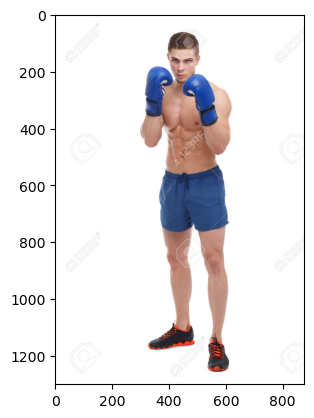

In [20]:
img = cv.imread("img2.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [21]:
#perform pose detection after converting the image into RGB format:

resultat = pose.process(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# check if any landmarks are found
if resultat.pose_landmarks:
    for i in range(2):
        #Display the found normalized landmarks
        print(f'{mp_pose.PoseLandmark(i).name} :\n {resultat.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE :
 x: 0.51012063
y: 0.15012056
z: -0.58720374
visibility: 0.9996648

LEFT_EYE_INNER :
 x: 0.5266569
y: 0.12680879
z: -0.5572242
visibility: 0.9995327



In [22]:
image_height, image_width, _ = img.shape

if resultat.pose_landmarks:
    for i in range(2):
        print(f'{mp_pose.PoseLandmark(i).name}')
        print(f' x :{resultat.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f' y :{resultat.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f' z :{resultat.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility : {resultat.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE
 x :446.86567211151123
 y :195.15672326087952
 z :-514.390477180481
visibility : 0.9996647834777832

LEFT_EYE_INNER
 x :461.3514668941498
 y :164.8514300584793
 z :-488.12841153144836
visibility : 0.9995326995849609



In [23]:
# create a copy of image to draw landmarks on. 
img_copy = img.copy()

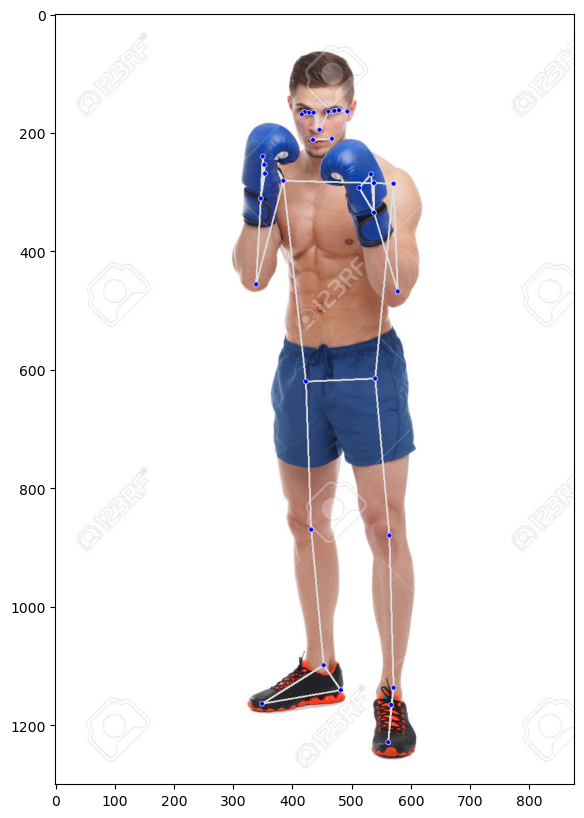

In [24]:
#check if any landmarks are found
if resultat.pose_landmarks:
    #draw pose landmarks on the image
    mp_drawing.draw_landmarks(image = img_copy, landmark_list= resultat.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
    # specify size of figure
    fig = plt.figure(figsize = (10,10))
    plt.imshow(img_copy);
    plt.show()

In [25]:
def detectionPose(img, pose, display = True):
    #Create the copy of image
    output_image = img.copy()
    #convert image from BGR into RGB
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    #perform pose detection
    
    resultats = pose.process(imgRGB)
    
    # Retrieve the height and widh of the input image
    
    height, width, _ = img.shape
    # Initialize a list to store the detected landmarks.
    
    landmarks = []
    # check if any landmarks are detecded
    if resultats.pose_landmarks:
        # Draw pose landmarks on output image
        mp_drawing.draw_landmarks(image = output_image, landmark_list = resultats.pose_landmarks, connections = mp_pose.POSE_CONNECTIONS, landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=5))
        #Iterate over the detecded landmarks.
                
        for landmark in resultats.pose_landmarks.landmark:
            #Append landmark into the list
            landmarks.append((int(landmark.x * width), int(landmark.y * height), int(landmark.z * width)))
            
    # check if the original input image and the resultant image are specified to be displayed
                
    if display:
        #Display original input image  and the resultant image:
        plt.figure(figsize=(22,22))
        plt.subplot(121)
        plt.imshow(img)
        plt.title("Original image")
        plt.axis('off')
        plt.subplot(122)
        plt.imshow(output_image)
        plt.title("Output image")
        plt.axis('off')
                    
        # Also plot the pose landmarks in 3D
        mp_drawing.plot_landmarks(resultat.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    # otherwise
    else:
                                  
        # return de output image and the found landmarks
        return output_image, landmarks
                                  
                                  
        
    

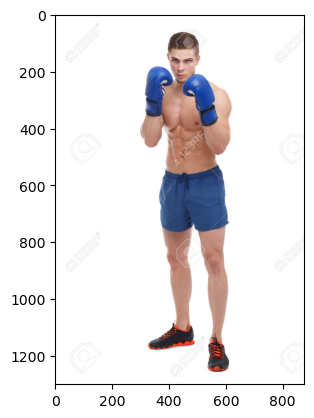

In [26]:
# we will utilize the function created a above to perform pose detection
img = cv.imread("img2.jpg")
plt.imshow(img[:,:,::-1])

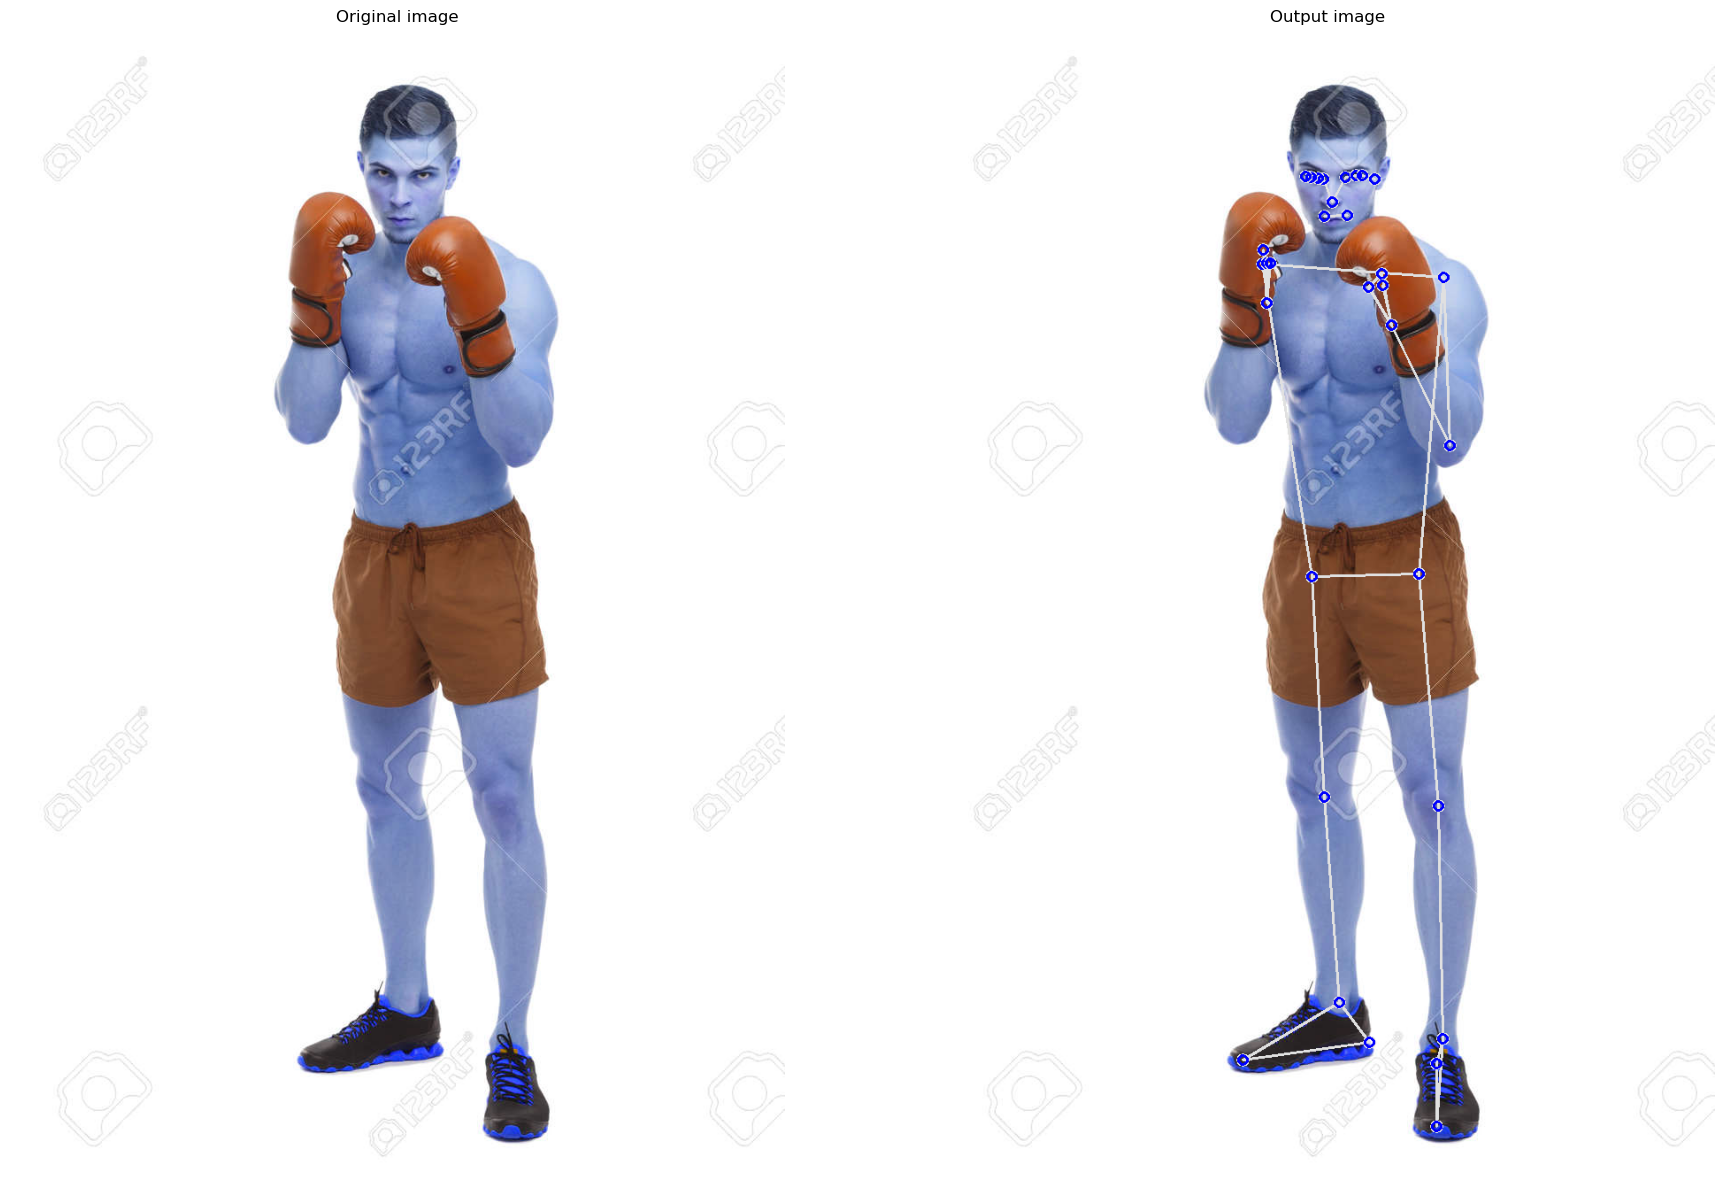

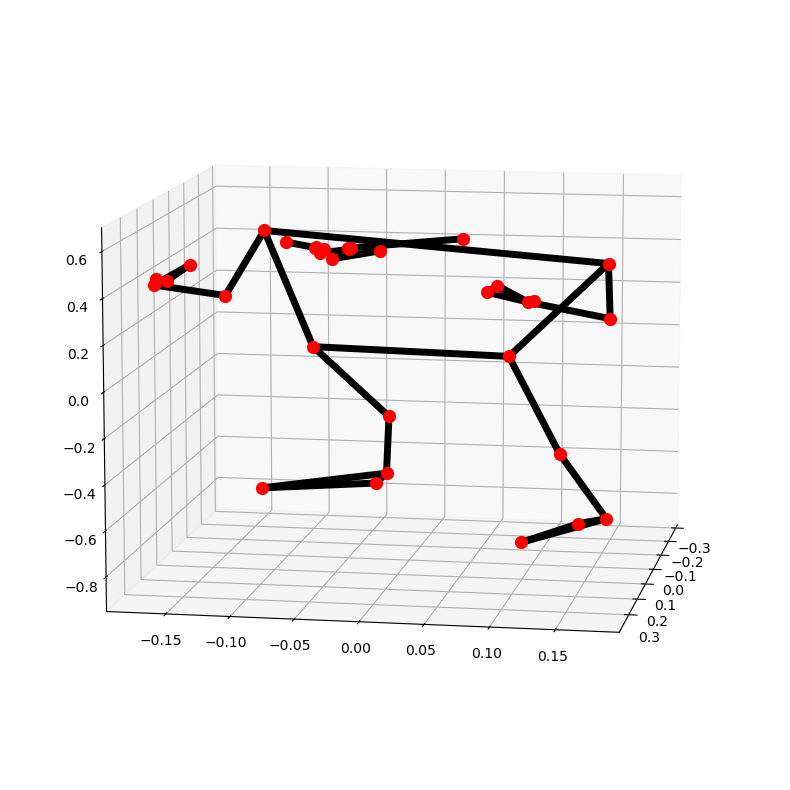

In [27]:
detectionPose(img, pose, display=True)

In [28]:
img = cv.imread("sample1.jpg")
img = img[:,:,::-1]


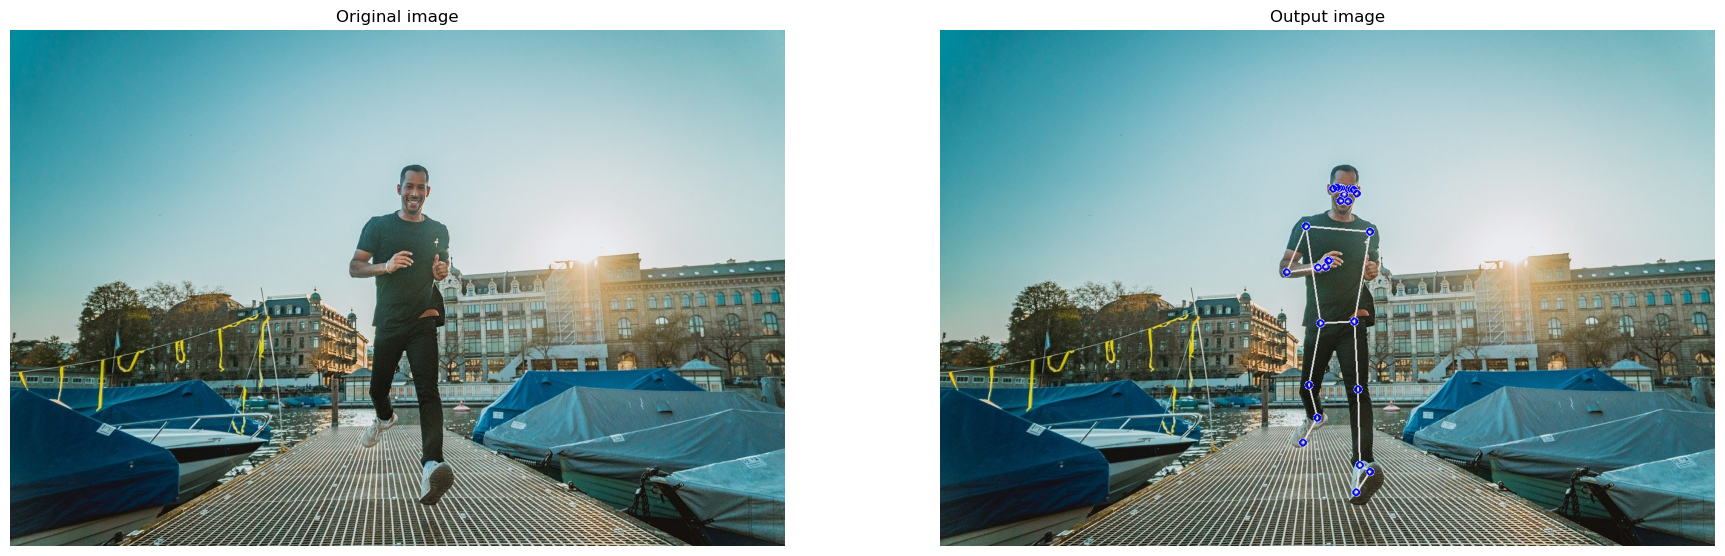

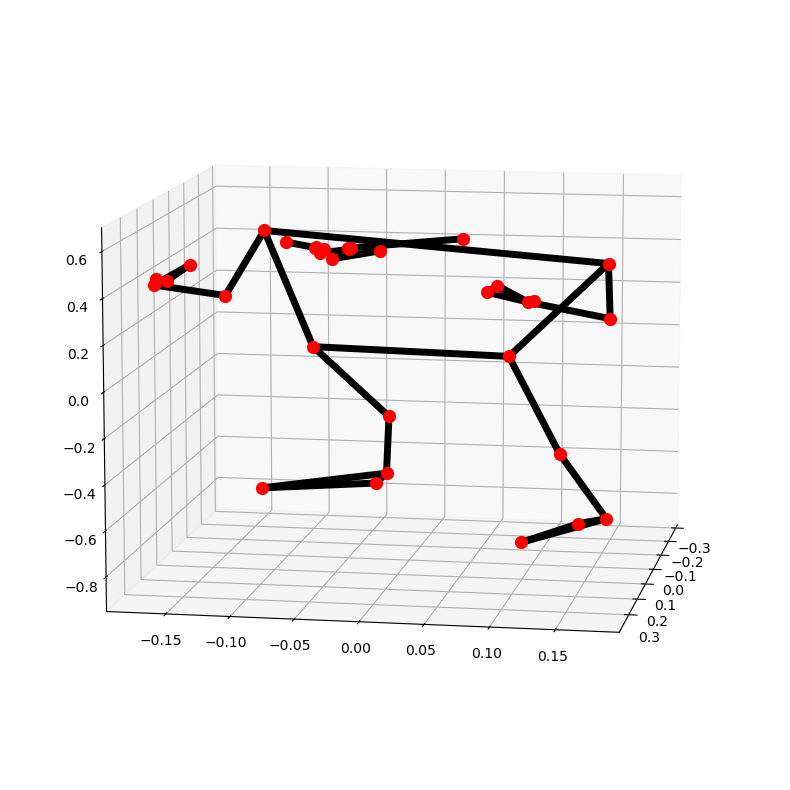

In [29]:
detectionPose(img, pose, display=True)

In [30]:
#Video detection

In [36]:
# stup pose function for video
pose_video = mp_pose.Pose(static_image_mode = False, min_detection_confidence = 0.5, model_complexity = 1)
#Initialize the video capture object to read form the webcam
Video = cv.VideoCapture(0)
#Create named window for risizing purposes
cv.namedWindow('Pose dection', cv.WINDOW_NORMAL)

#set video camera size
Video.set(3, 1280)
Video.set(4, 960)

#initialize a variable to store the time
time1 = 0

#iterate until the video is accessed successfully
while Video.isOpened():
    #read the frame
    ok ,frame = Video.read()
    
    if ok == True:
        #Flip the frame for horizontally natural
        frame = cv.flip(frame, 1)
        #Get the width and heigth of the frame
        frame_height, frame_width, _ = frame.shape
        #Resize the frame while keeping the aspect ratio
        frame = cv.resize(frame, (int(frame_width * (640 /frame_height)), 640))
        #perform pose landmarks detection
        frame, _ = detectionPose(frame, pose_video, display = False)
        
        #set the time for this frame to the current time
        time2 = time()
        #check if the difference between the previous and this frame time > 0 to avoid division by 0
        if (time2 - time1 > 0) :
            # calculate the number fo frames per seconds
            frame_per_second = 1.0 / (time2 - time1)
            # Write the calculate number  of frame per second on frame
            cv.putText(frame, 'FPS: {}'.format(int(frame_per_second)), (10,30), cv.FONT_HERSHEY_PLAIN, 2 , (0, 255, 0), 3)
            
            # update the previous frame time to this frame time
            time1 = time2
            # Display the frame
            cv.imshow('Pose detection', frame)
            
            #wait until the key is pressed.
            
            key = cv.waitKey(1)
            
            if key == ord('q') or key == 27 or cv.getWindowProperty("Pose detection", cv.WND_PROP_VISIBLE) < 1:
                # break up the loop
                break
        
        
        
        
    else:
        # break up if we are not to read the frame
        break
    
# release the video capture object
Video.release()
# close the windows
cv.destroyAllWindows()



In [37]:
#----------------------------------------------------------------------------
# calculate angle
#--------------------------------------------------------------------------
def calculateAngle(landmark1, landmark2, landmark3):
    
    #Get the requirement landmarks coordinates.
    x1, y1,_ = landmark1
    x2, y2,_ = landmark2
    x3, y3,_ = landmark3
    
    #Calculate the angle between the tree points
    angle = math.degrees(math.atan2(y3-y2, x3-x2) - math.atan2(y1-y2, x1-x2))
    
    # check if the angle is less than zero
    if angle < 0:
        #Add 360 to the found angle
        angle += 360
    # return the calculate angle
    return angle


In [44]:
# now we will test the function create above to calculate angle
angle = calculateAngle((558,326,0), (642,333,0),(718,321,0))

In [52]:
print(f'the angle is {angle}')

the angle is 166.26373169437744


In [53]:
# create a function perform pose classification 

def classifyPose(landmarks, output_image, display = False):
    
    #initialize the label of the pose. It is not known at this stage.
    label = "Unknown Pose"
    # specify the color (red) with wich the label will be written on the image
    color = (0,0,255)
    
    #calculate the required angle
    #get the angle between the left shoulder, elbow and wrist points 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # get the angle between the right shoulder, elbow and wrist points
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])
    

    
    # get the angle between the left elbow shoulder and hip  points
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                          landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
    
    # get the angle between the right elbow shoulder and hip  pointsf
    right_shoulder_angle = calculateAngle( landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                           landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                           landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
    # get the angle between the left hip, knee and angle ankle points
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                          landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    
        
    # get the angle between the right hip knee and ankle  points
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    
    #check if it is warrior II pose or T pose 
    
    #check if the both arms are straight.
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
        #check if shoulder are at the riquired angle
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
        
            #check if it is warrior II pose 
            #----------------------------------------------------------------
            #check if one leg is straight.
            if left_knee_angle > 165 and left_knee_angle < 195 and right_knee_angle > 165 and right_knee_angle < 195:
                #check if the other leg is bended at the riquired angle
                if left_knee_angle > 90 and left_knee_angle < 120 and right_knee_angle > 90 and right_knee_angle < 120:
                    #Specify the label as Warrior II pose 
                    label = "Warrior II pose"
    
    
    #check if it is the T pose
            # chech if both legs are straight
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:
                # specify the label of the pose that is tree pose
                label = "T pose"
    #------------------------------------------------------------------------         
    #check if it is the tree pose
    #-----------------------------------------------------------------------
    #check if one leg is straight
    
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
        
        #check if other leg is bended at the require angle
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angl < 45:
            
                #specify the label of the pose that is tree pose
                label = "Tree pose"
    #------------------------------------------------------------------------------
    # check if the pose are classified successfully
    if label != "Unknown Pose":
        # update the color (to green) with wich the label will be written on the image.
        color =(0,255,0)
    # write the label on the output image
    cv.putText(output_image, label, (10,20), cv.FONT_HERSHEY_PLAIN, 2, color,2)
    
    # check if the resultant image is specify the displayed
    
    if display:
        
        # Display to the resultant image
        plt.figure(figsize = (10,10))
        plt.imshow(output_image[:,:,::-1])
        plt.title("Output image")
        plt.axis('off');
    
    else:
        #return the output image and the classified label
        return output_image, label
